In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


    | fit_transform():
This fit_transform() method is basically the combination of fit method and transform method, it is equivalent to fit().transform()

 It is used on the training data so that we can scale the training data and also learn the scaling parameters. Here, the model built will learn the mean and variance of the features of the training set. These learned parameters are then further used to scale our test data.

    | MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

features=df.drop('price',axis='columns')
scaled_x=scaler.fit_transform(features) # separating features columns and scaled their values
scaled_x

In [4]:
df.shape[0] # refers number of row
df.shape[1] # refers number of column

3

scaled_y=scaler.fit_transform(df['price'].values.reshape(df.shape[0],1)) # separating target columns and scaled their values
scaled_y 

In [5]:
np.ones(shape=2) # it refers weight w1, w2

array([1., 1.])

In [6]:
#np.dot(w,scaled_x.T)

# Batch Gradient Descen

In [7]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01): # Learning rate which can control an algorithm how fast we want to learn
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features)) # refers weight w1 & w2
    bias=0 # bias 
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+bias #w1*area+w2*bedroom+bias 
        w_grad=-(2/total_samples)*(x.T.dot(y_true - y_predicted)) # calculate gradiant descent using partial derivative
        b_grad=-(2/total_samples)*np.sum(y_true - y_predicted)
        w=w-learning_rate*w_grad # calculate weight
        bias=bias-learning_rate*b_grad # calculate bias  
        cost=np.mean( np.square(y_true-y_predicted)) # calculate cost value
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost, cost_list, epoch_list
w,bias,cost, cost_list, epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,bias,cost
# showing result of  w1, w2, bias, log loss (cost) value



(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

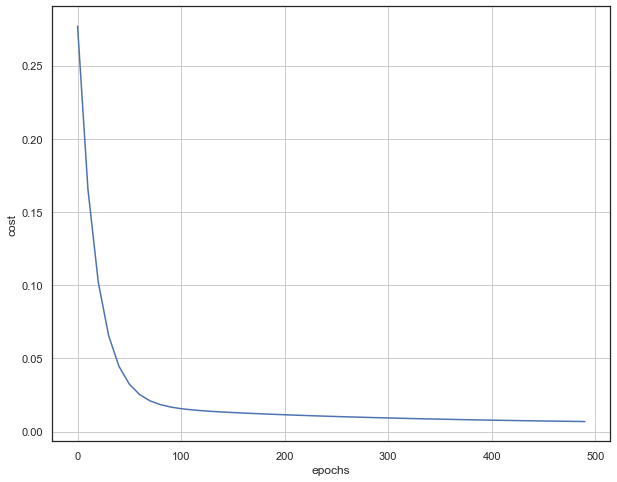

In [8]:
# relation between each epochs and log loss(cost) value 
plt.figure(figsize=(10,8)) 
sns.set(style='white')
plt.plot(epoch_list,cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid()
plt.show()

In [9]:
df.columns

Index(['area', 'bedrooms', 'price'], dtype='object')

# House price prediction

In [26]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [19]:
def predict(area,bedrooms,w,bias):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+bias
    return sy.inverse_transform([[scaled_price]]) [0][0]

In [23]:
predict(2600,4,w,bias) # predicted price

0.7144803261679701


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [22]:
predict(1000, 2, w,bias)

-0.012940041018945525


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [27]:
predict(1500, 3, w,bias)

0.27761931746034774


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

# Stochastic Gradient Descent

In [39]:
import random
random.randint(0,6) # Return random integer in range [a, b], including both end points.


6

In [47]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01): # Learning rate which can control an algorithm how fast we want to learn
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features)) # refers weight w1 & w2
    bias=0 # bias 
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=random.randint(0, total_samples-1)
        sample_x=x[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+bias #w1*area+w2*bedroom+bias 
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted)) # calculate gradiant descent using partial derivative
        b_grad=-(2/total_samples)*(sample_y - y_predicted)

        w=w-learning_rate*w_grad # calculate weight
        bias=bias-learning_rate*b_grad # calculate bias  

        cost=np.mean( np.square(sample_y-y_predicted)) # calculate cost value
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost, cost_list, epoch_list
w_sgd,bias_sgd,cost_sgd, cost_list_sgd, epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,bias_sgd,cost_sgd

(array([0.7096826 , 0.67684429]), -0.22985563060713432, 0.0031590426747811523)

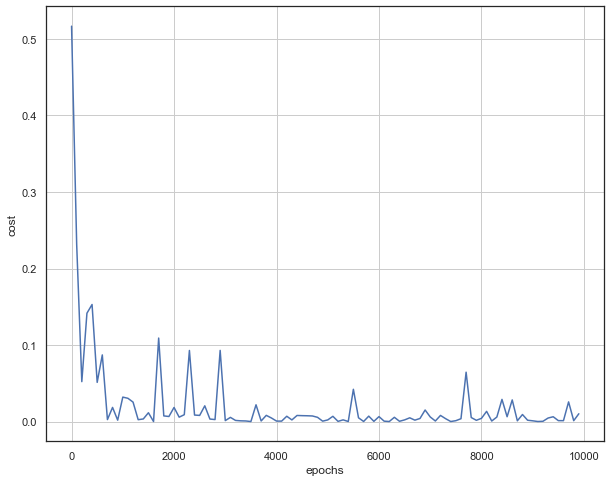

In [48]:
# relation between each epochs and log loss(cost) value 
plt.figure(figsize=(10,8)) 
sns.set(style='white')
plt.plot(epoch_list_sgd,cost_list_sgd) # Stochastic Gradient Descent
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid()
plt.show()

In [ ]:
def predict(area,bedrooms,w,bias):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+bias
    return sy.inverse_transform([[scaled_price]]) [0][0]

In [49]:
predict(1000, 2, w_sgd,bias_sgd)

-0.011700931652022545


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.420374226976957

In [50]:
predict(2600, 4, w_sgd,bias_sgd)

0.7182702305391887


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.96648112279047